## Spotify Chart Data

https://www.kaggle.com/datasets/dhruvildave/spotify-charts

Top 200 and Viral 50 since 2017

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pathlib import Path
import requests
import sys
import json

In [2]:
cid = Path('_keys/clientId.txt').read_text()
secret = Path('_keys/secret.txt').read_text()

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [3]:
charts = pd.read_csv('charts.csv')

In [4]:
charts

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


In [5]:
charts.shape

(26173514, 9)

In [6]:
charts.date.describe()

count       26173514
unique          1826
top       2020-12-24
freq           17022
Name: date, dtype: object

In [7]:
type(charts.date[0])

str

In [8]:
charts.date.nunique()

1826

In [9]:
charts.groupby('artist')['title'].count().sort_values(ascending=False)

artist
Ed Sheeran                    387917
Billie Eilish                 251825
Post Malone                   211272
Bad Bunny                     203403
Ariana Grande                 189914
                               ...  
Hindia, Natasha Udu, Kamga         1
Hinap                              1
Himmel                             1
Himeko                             1
Ｍ, 兩千 2ØØØ, RedcolorG              1
Name: title, Length: 96156, dtype: int64

In [10]:
charts.groupby('chart').count()

,title,rank,date,artist,url,region,trend,streams
chart,,,,,,,,
top200,20321897,20321904,20321904,20321904,20321904,20321904,20321904,20321904
viral50,5851606,5851610,5851610,5851592,5851610,5851610,5851610,0


In [4]:
viral50 = charts[charts.chart == 'viral50']
top200 = charts[charts.chart == 'top200']

In [12]:
viral50

,title,rank,date,artist,url,region,chart,trend,streams
12808,Boys,13,2017-08-01,Charli XCX,https://open.spotify.com/track/5o4yGlG0PfeVUa6...,Latvia,viral50,MOVE_UP,NaN
12965,Hold Me,19,2017-08-01,R3HAB,https://open.spotify.com/track/2a9xGmpgNyNz9QV...,Luxembourg,viral50,MOVE_DOWN,NaN
13781,Hola Hola,40,2017-08-01,KARD,https://open.spotify.com/track/3VC1IEz9M1txlMS...,Peru,viral50,NEW_ENTRY,NaN
14042,Cuídate,4,2017-08-01,Zetazen,https://open.spotify.com/track/0WgnbqlHieZmdYa...,Spain,viral50,SAME_POSITION,NaN
14092,Boys,13,2017-08-01,Charli XCX,https://open.spotify.com/track/5o4yGlG0PfeVUa6...,Taiwan,viral50,MOVE_DOWN,NaN
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


In [13]:
print('unique songs in viral50 charts: ', viral50.url.nunique())
print('count of countries with viral50 chart:', viral50.region.nunique())
print('count of unique artists in viral50 chart:', viral50.artist.nunique())

unique songs in viral50 charts:  148025
count of countries with viral50 chart: 70
count of unique artists in viral50 chart: 81123


In [14]:
tracks_by_country = viral50.groupby('region').url.nunique().sort_values(ascending=False)

<AxesSubplot:>

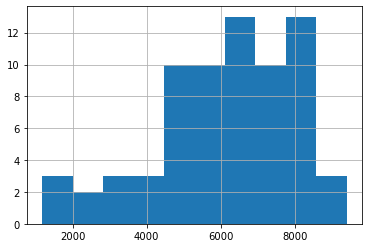

In [15]:
tracks_by_country.hist()

In [5]:
us = viral50[viral50.region == 'United States']
us.head()

,title,rank,date,artist,url,region,chart,trend,streams
53675,LMK,32,2017-08-09,Kelela,https://open.spotify.com/track/6XgtAeRYmbr4OfE...,United States,viral50,NEW_ENTRY,NaN
57282,Turn Up On the Weekend,1,2017-08-01,"Branchez, Big Wet",https://open.spotify.com/track/2AEzMPR01sg1wsX...,United States,viral50,SAME_POSITION,NaN
57283,Would You Ever,2,2017-08-01,"Skrillex, Poo Bear",https://open.spotify.com/track/57p8CBvPOxrvyCb...,United States,viral50,SAME_POSITION,NaN
57284,Marmalade (feat. Lil Yachty),3,2017-08-01,Macklemore,https://open.spotify.com/track/0RYXEibxMami3Qu...,United States,viral50,MOVE_UP,NaN
57285,Boys,4,2017-08-01,Charli XCX,https://open.spotify.com/track/5o4yGlG0PfeVUa6...,United States,viral50,MOVE_UP,NaN


In [17]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90873 entries, 53675 to 26173414
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    90873 non-null  object 
 1   rank     90873 non-null  int64  
 2   date     90873 non-null  object 
 3   artist   90873 non-null  object 
 4   url      90873 non-null  object 
 5   region   90873 non-null  object 
 6   chart    90873 non-null  object 
 7   trend    90873 non-null  object 
 8   streams  0 non-null      float64
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [18]:
us.groupby('date').count().max()

title      50
rank       50
artist     50
url        50
region     50
chart      50
trend      50
streams     0
dtype: int64

In [19]:
us.groupby('title').url.nunique().sort_values(ascending=False)

title
Better                                              8
Body                                                8
Toxic                                               5
Heaven                                              5
Sober                                               5
                                                   ..
Havin My Way (feat. Lil Durk)                       1
Have You Ever Seen the Rain (feat. Paula Nelson)    1
Have It All                                         1
Havana - Remix                                      1
항상 (HANGSANG)                                       1
Name: url, Length: 6915, dtype: int64

In [6]:
print('unique tracks in US Viral 50 dataset:', us.url.nunique())
print('unique artists in US Viral 50 dataset:', us.artist.nunique())

unique tracks in US Viral 50 dataset: 7974
unique artists in US Viral 50 dataset: 4380


In [21]:
us.groupby('url').date.nunique().sort_values(ascending=False).head(5)

url
https://open.spotify.com/track/24Yi9hE78yPEbZ4kxyoXAI    199
https://open.spotify.com/track/3VTNVsTTu05dmTsVFrmGpK    194
https://open.spotify.com/track/1rgnBhdG2JDFTbYkYRZAku    178
https://open.spotify.com/track/1Cv1YLb4q0RzL6pybtaMLo    165
https://open.spotify.com/track/0xxZY5C9xxij3D1HkzbnfC    161
Name: date, dtype: int64

In [7]:
us['date'] = pd.to_datetime(us['date'])

<ipython-input-7-27dea3e59ed0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['date'] = pd.to_datetime(us['date'])


<AxesSubplot:title={'center':'Roses by St. JHN Rank movement'}, xlabel='date'>

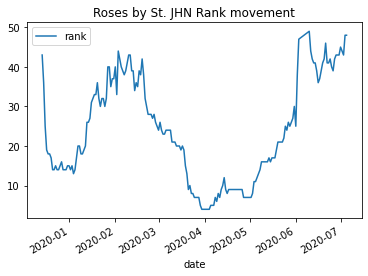

In [8]:
us[us.url == 'https://open.spotify.com/track/24Yi9hE78yPEbZ4kxyoXAI'].plot(x='date',y='rank',title='Roses by St. JHN Rank movement')

In [24]:
us[us.url == 'https://open.spotify.com/track/24Yi9hE78yPEbZ4kxyoXAI'].date.max()

Timestamp('2020-07-05 00:00:00')

In [25]:
us[us.url == 'https://open.spotify.com/track/24Yi9hE78yPEbZ4kxyoXAI'].date.min()

Timestamp('2019-12-14 00:00:00')

In [26]:
us.groupby('trend').date.count()

trend
MOVE_DOWN        36361
MOVE_UP          25449
NEW_ENTRY         9345
SAME_POSITION    19718
Name: date, dtype: int64

In [27]:
us.groupby('artist').url.count().sort_values(ascending=False)

artist
Drake                      493
Lizzo                      491
Doja Cat                   463
DaBaby                     328
Billie Eilish              328
                          ... 
Nicotine's Famous Honey      1
Nicky Romero, Taio Cruz      1
Bantu                        1
Choker                       1
Sheff G, Sleepy Hallow       1
Name: url, Length: 4380, dtype: int64

<AxesSubplot:>

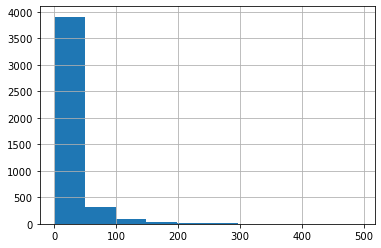

In [28]:
us.groupby('artist').url.count().sort_values(ascending=False).hist()

In [29]:
artist_track_count = us.groupby('artist').url.count().sort_values(ascending=False)

In [30]:
print('artists with under 100 tracks on viral50:', artist_track_count[artist_track_count < 100].shape[0])
print('artists with over 100 tracks on viral50:', artist_track_count[artist_track_count >= 100].shape[0])
print(artist_track_count[artist_track_count >= 100].shape[0]/artist_track_count[artist_track_count < 100].shape[0])

artists with under 100 tracks on viral50: 4228
artists with over 100 tracks on viral50: 152
0.03595080416272469


In [31]:
us

,title,rank,date,artist,url,region,chart,trend,streams
53675,LMK,32,2017-08-09,Kelela,https://open.spotify.com/track/6XgtAeRYmbr4OfE...,United States,viral50,NEW_ENTRY,NaN
57282,Turn Up On the Weekend,1,2017-08-01,"Branchez, Big Wet",https://open.spotify.com/track/2AEzMPR01sg1wsX...,United States,viral50,SAME_POSITION,NaN
57283,Would You Ever,2,2017-08-01,"Skrillex, Poo Bear",https://open.spotify.com/track/57p8CBvPOxrvyCb...,United States,viral50,SAME_POSITION,NaN
57284,Marmalade (feat. Lil Yachty),3,2017-08-01,Macklemore,https://open.spotify.com/track/0RYXEibxMami3Qu...,United States,viral50,MOVE_UP,NaN
57285,Boys,4,2017-08-01,Charli XCX,https://open.spotify.com/track/5o4yGlG0PfeVUa6...,United States,viral50,MOVE_UP,NaN
...,...,...,...,...,...,...,...,...,...
26173410,Bad Habits,46,2021-07-31,Ed Sheeran,https://open.spotify.com/track/6PQ88X9TkUIAUIZ...,United States,viral50,SAME_POSITION,NaN
26173411,Not Around,47,2021-07-31,Nova,https://open.spotify.com/track/1Adhz5VVDZxhojO...,United States,viral50,SAME_POSITION,NaN
26173412,Buy Dirt,48,2021-07-31,"Jordan Davis, Luke Bryan",https://open.spotify.com/track/69AIpwGNLxr4qS1...,United States,viral50,MOVE_UP,NaN
26173413,Mónaco,49,2021-07-31,"LAGOS, Danny Ocean",https://open.spotify.com/track/3HgvO4B5LLmdPOT...,United States,viral50,NEW_ENTRY,NaN


In [6]:
us.url[53675]

'https://open.spotify.com/track/6XgtAeRYmbr4OfEUP3q0D3'

In [7]:
#make call to api with track uri
#roses = 'https://open.spotify.com/track/24Yi9hE78yPEbZ4kxyoXAI'
x = 'https://open.spotify.com/track/6XgtAeRYmbr4OfEUP3q0D3'
track_results = sp.track(x)

In [8]:
track_results['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1U0sIzpRtDkvu1hXXzxh60'},
 'href': 'https://api.spotify.com/v1/artists/1U0sIzpRtDkvu1hXXzxh60',
 'id': '1U0sIzpRtDkvu1hXXzxh60',
 'name': 'Kelela',
 'type': 'artist',
 'uri': 'spotify:artist:1U0sIzpRtDkvu1hXXzxh60'}

In [9]:
track_results['artists'][0]['name']

'Kelela'

In [10]:
#add artist URI column to US Viral50 dataframe
def artist_uri(df):
    empty_uri=[]
    for i in df.url:
        print(i)
        track = i
        
        track_results = sp.track(i)
        uri= track_results['artists'][0]['uri']
        
        empty_uri.append(uri)
    
    return empty_uri

def first_artist_name(df):
    empty_name=[]
    for i in df.url:
        print(i)
        track = i
        
        track_results = sp.track(i)
        name = track_results['artists'][0]['name']
        
        empty_name.append(name)
    
    return empty_name

In [11]:
us.shape

(90873, 9)

In [12]:
us.url.nunique()

7974

In [18]:
artist_metadata = pd.DataFrame(columns=['url','name','artist_uri'])

for i in us.url.unique():
    url = i
    print(i)
    track_results = sp.track(i)
    name = track_results['artists'][0]['name']
    artist_uri = track_results['artists'][0]['uri']
    
    artist_metadata = artist_metadata.append({'url':url,
                           'name': name,
                           'artist_uri':artist_uri},ignore_index=True)

https://open.spotify.com/track/6XgtAeRYmbr4OfEUP3q0D3
https://open.spotify.com/track/2AEzMPR01sg1wsXurYrgDx
https://open.spotify.com/track/57p8CBvPOxrvyCbn6ttl5r
https://open.spotify.com/track/0RYXEibxMami3QuT8kn4Iz
https://open.spotify.com/track/5o4yGlG0PfeVUa6ClIyOxq
https://open.spotify.com/track/7F9vK8hNFMml4GtHsaXui6
https://open.spotify.com/track/0ZiRSqlSsDlY0UyDYU9CTE
https://open.spotify.com/track/2771LMNxwf62FTAdpJMQfM
https://open.spotify.com/track/3JKhmIlixlYwFLzrkc6drb
https://open.spotify.com/track/5c0xgHZU3E8bfTFWiwWxA0
https://open.spotify.com/track/7xNk3mDmOdHlUfnjYgrh8X
https://open.spotify.com/track/03YoRDLmG333y0ORu2D5A4
https://open.spotify.com/track/0Hq7HRnBbvZBvmlmQ6vYgX
https://open.spotify.com/track/7Ewumzq8MHlC6OwNhBybGl
https://open.spotify.com/track/4sVBJjHVPBkHNokNeRpy23
https://open.spotify.com/track/0ltO5bci13M68sTnEctBxR
https://open.spotify.com/track/2rb5MvYT7ZIxbKW5hfcHx8
https://open.spotify.com/track/1Sl3njkhhz8nrSPZroDQ82
https://open.spotify.com/tra

https://open.spotify.com/track/1A7kwob3XbkKtq8gKOYlHv
https://open.spotify.com/track/3MMwcrgTCJ7bOAIScTyXFk
https://open.spotify.com/track/7ofxPmTNMj2GP07g1VZa0O
https://open.spotify.com/track/4VwX2Ycso2PjDvQA9FbfBp
https://open.spotify.com/track/2hpqjWn2f4rszTS8v0nfVR
https://open.spotify.com/track/2oQAF4EWvPHGWlWWPQkaGh
https://open.spotify.com/track/50Y5DKzkMsTws48NvpuN5s
https://open.spotify.com/track/4zii9cq9ZgxYJFnaxM3Tul
https://open.spotify.com/track/67c4kWwica8i1bxNJc1rkq
https://open.spotify.com/track/3T6Mtmmx5OfrIUFfpJ1uB1
https://open.spotify.com/track/0GyNfI3eKLWQJ5QwXo4WL6
https://open.spotify.com/track/5IpBSdURmzZlN0cVwlX95n
https://open.spotify.com/track/6c54HhGqvxlLavDsDzyLiw
https://open.spotify.com/track/2DRk66DsTtDrUsCEOmvQaq
https://open.spotify.com/track/3JES1NY6P9vy7WrCReclG9
https://open.spotify.com/track/5u0TIvy1WTpD6JDrwbw7Vj
https://open.spotify.com/track/2YSUqtM3ubhJXRlOsE6mDb
https://open.spotify.com/track/4s5rzdMriNSncijst8MCx1
https://open.spotify.com/tra

https://open.spotify.com/track/6ZpTBpbC4PIUjWEHS59Wmu
https://open.spotify.com/track/7LzdE75Ii1HLGWhhIJK4hD
https://open.spotify.com/track/3EeJFtyGGvlCU2ZAxA5WzA
https://open.spotify.com/track/1lIYXCQKvrKD4Y08sKf9kv
https://open.spotify.com/track/5qF7WVVqP6uvQ4meLY7K7M
https://open.spotify.com/track/41dBaqp4zM57WTfZ72NAf5
https://open.spotify.com/track/2GDurWqMjyoIN4tufyWMHw
https://open.spotify.com/track/2XbPIycgx6OkOXQ9IHbbmL
https://open.spotify.com/track/560Ac5wm8qT64yGNRKRhpN
https://open.spotify.com/track/6HicBL9RxtWwNK7sS2AHHU
https://open.spotify.com/track/1OmcAT5Y8eg5bUPv9qJT4R
https://open.spotify.com/track/1cURnGaH9mR7YM8SsJHZeS
https://open.spotify.com/track/7rdUtXasA973gmrr2Xxh3E
https://open.spotify.com/track/1Cicn7ce1xoVlq8gthE2eX
https://open.spotify.com/track/7oW8aBcg9O71aRVEX0hOEU
https://open.spotify.com/track/1tp1xMJ1uaOktksskS0Fzs
https://open.spotify.com/track/0iALOYqXaVoluUIsSyDAny
https://open.spotify.com/track/3hRZsdTF5uyGA2uhNqEuhm
https://open.spotify.com/tra

https://open.spotify.com/track/3TTMUI5dFcbeNSDTTDY9M8
https://open.spotify.com/track/3cphb8kdsjElYR7r5icK3H
https://open.spotify.com/track/5hDAT527wXWNBnJlujhuUs
https://open.spotify.com/track/2tnVG71enUj33Ic2nFN6kZ
https://open.spotify.com/track/0WkZQPNC0c7yrsMX1arVAd
https://open.spotify.com/track/7a6gK5GwlIvGTU4ayZhskd
https://open.spotify.com/track/2rTnVB1bvwxHtaIl4uVu7f
https://open.spotify.com/track/0c7K73roy6RW4ebDkf4yGh
https://open.spotify.com/track/63W11KVHDOpSlh3XMQ7qMg
https://open.spotify.com/track/5FkoSXiJPKTNyYgALRJFhD
https://open.spotify.com/track/2KUL1Ix9grxAWvIAft9EWL
https://open.spotify.com/track/5h5reMGNpL19vdn5wMkbNn
https://open.spotify.com/track/7zd2lGi4kXdzpGXlLUHLPM
https://open.spotify.com/track/2J9B63FawlTaPdg4eH5X03
https://open.spotify.com/track/2xyx0o4xNOLLjBSbOOdcbA
https://open.spotify.com/track/2h47SG8bNphmicAll4H9RV
https://open.spotify.com/track/6VYXuUz1nYMap8gtqeIrQB
https://open.spotify.com/track/6qmY21MWIcAEPf9G80wKfb
https://open.spotify.com/tra

https://open.spotify.com/track/6tUgfsOa8PLkoede5nOR7D
https://open.spotify.com/track/7sO5G9EABYOXQKNPNiE9NR
https://open.spotify.com/track/0tDfp0vFR95Gg6Mrhza3lX
https://open.spotify.com/track/1LgNXucKQHGybDwernsNo2
https://open.spotify.com/track/5u6vkDnOyaf8LsteDAj2ub
https://open.spotify.com/track/4gRAniZdYF2zVrDUsNC9tU
https://open.spotify.com/track/5hcisvFMidkMJlElTO9Qmw
https://open.spotify.com/track/0Gux2yTMWYOlcBUNjGJu5p
https://open.spotify.com/track/0lRhj7HyP2KObeyFPUOPRA
https://open.spotify.com/track/7LXM97BaNrmhGGCajjPLCo
https://open.spotify.com/track/4lUnFLtn8w3W76FiYDRzmO
https://open.spotify.com/track/77bKLlmIwnG68X6wsi8Ord
https://open.spotify.com/track/4S2WtfT03YDIlXEwSX4Tjd
https://open.spotify.com/track/6GNifiuBPrKFpwNBYnooFm
https://open.spotify.com/track/1gWgaCmXX9G5IxeyZPWooW
https://open.spotify.com/track/4lESS6vuruP6a79KWRaQou
https://open.spotify.com/track/0tPQPaOKM32WgMSbPCYyRH
https://open.spotify.com/track/7LAhKXDNWwq3CmnFP3UIOP
https://open.spotify.com/tra

https://open.spotify.com/track/1zsG4eaZmkA1dvjDDsAGLK
https://open.spotify.com/track/2NhaNAacBOf1ZKzjRYuEb5
https://open.spotify.com/track/5AfJXFkWlmLBJhI23TNCIK
https://open.spotify.com/track/0NKh1STZG1VgnVwntJF3ze
https://open.spotify.com/track/4vSGt6RC1GcfA07OGE3rcs
https://open.spotify.com/track/01iiEi9h8CQGUN2K1xBbTj
https://open.spotify.com/track/6mVjlizvk7mq58DJl7pQ2j
https://open.spotify.com/track/2NEhPLA6cq55GiNGT7hiHd
https://open.spotify.com/track/3xWwPvpAv1HbKFmTwf6uKR
https://open.spotify.com/track/22nyEAEM29tcBRhukR089b
https://open.spotify.com/track/0OI7AFifLSoGzpb8bdBLLV
https://open.spotify.com/track/0RGUIOZtmOXTWOy5EjvQbP
https://open.spotify.com/track/2d3NAGCKudIYpTlRI6BI0s
https://open.spotify.com/track/2JBNgpJV8Gn3EZoWixjJO0
https://open.spotify.com/track/3zzDs7euxA9c5guPOt7A1B
https://open.spotify.com/track/37nD8NJhod8BEZ6EGYo2gT
https://open.spotify.com/track/6CN8zBU4Qzm6Wp9nmGpauZ
https://open.spotify.com/track/2yUq0wCW8j2JYwkWcd5GyJ
https://open.spotify.com/tra

https://open.spotify.com/track/1c0flvMImhKMuiZIc0VzEb
https://open.spotify.com/track/4ZA0EXmjnZIYguEMf0Mc88
https://open.spotify.com/track/52okn5MNA47tk87PeZJLEL
https://open.spotify.com/track/6Jz6C4VVi7hmQeC4rDt3A2
https://open.spotify.com/track/4AA8WO12TxwDHj2besjWcx
https://open.spotify.com/track/2iW5uc25ziGLlNMqdhFJad
https://open.spotify.com/track/2GcYEQs3uMnypRfSQCKcQp
https://open.spotify.com/track/5f5wlkRHWhYxOdp1hOUsTb
https://open.spotify.com/track/3xvFTqHmlMqKjHgczCGn2C
https://open.spotify.com/track/0HykTfW0Y0FmjzEJuA7H8U
https://open.spotify.com/track/68JS5SFTnW5Yv9Vzw81Jf0
https://open.spotify.com/track/6tN6rdEfm6ZtuKsqpoh3on
https://open.spotify.com/track/1bhUWB0zJMIKr9yVPrkEuI
https://open.spotify.com/track/3YU6vJbjYUG0tiJyXf9x5V
https://open.spotify.com/track/1m8WpLYXEiNVZchsWEcCSy
https://open.spotify.com/track/122lxLiuCUAdpaGOk2KSbe
https://open.spotify.com/track/2ScqDQj39xCVINvUwT5oqk
https://open.spotify.com/track/0LqcRfO94p7AJt4SHq3PS3
https://open.spotify.com/tra

https://open.spotify.com/track/3O4E0I9VrOtzBXwPvWBjl3
https://open.spotify.com/track/4Pv7OY4tfCA8KIdtlkANOS
https://open.spotify.com/track/1AnoNTlYCt1ELWArtKsA4s
https://open.spotify.com/track/0Azl7Di23Bp1555z60Zmmd
https://open.spotify.com/track/0VaIsQoIQY10uxBrOyZ5cQ
https://open.spotify.com/track/2njX8sZmCK4t7EKx2cS2Vb
https://open.spotify.com/track/0OgGn1ofaj55l2PcihQQGV
https://open.spotify.com/track/6xagjcywpcyNFghafZPQJv
https://open.spotify.com/track/6Wgh8KuahUMTr1EGQAsTGZ
https://open.spotify.com/track/5dqNCR3ANsOIMeQLpk54wU
https://open.spotify.com/track/4IYmJKwEsFTwQUdzsWSiv1
https://open.spotify.com/track/47wq2z7KMHDRnoSMdZODUA
https://open.spotify.com/track/4Dn6e6J8QLwdlX6EVCqxe1
https://open.spotify.com/track/1oNcADo4TZHpkfH8x1xRVW
https://open.spotify.com/track/2tPcTFiQF9MbVUyjZ3zDhA
https://open.spotify.com/track/5CLGzJsGqhCEECcpnFQA8x
https://open.spotify.com/track/6jA8JUuPCGYjFcgw0AoM5T
https://open.spotify.com/track/1OilOIju6R9ia8vilNjChh
https://open.spotify.com/tra

https://open.spotify.com/track/7zOoHxDt1duHL8czY7o7ab
https://open.spotify.com/track/0W363qrIc4GwuwOqa0WAEO
https://open.spotify.com/track/6aLpLTAUASREvQE105XOb3
https://open.spotify.com/track/2huH9q26JmfR0BzV4xKzny
https://open.spotify.com/track/2I88NEWpKrAPZuapXNV5G6
https://open.spotify.com/track/32DGGj6KlNuBr6WaqRxpxi
https://open.spotify.com/track/5ocFWdYiT1F71F5757ZsCu
https://open.spotify.com/track/2ZE3DJuizYTad2S4CvRRhK
https://open.spotify.com/track/2EWR4QeZ5U0eEYIQCK8YMg
https://open.spotify.com/track/3VupwwmeklG7tv2ELOJO8r
https://open.spotify.com/track/18c39avnbmFvihzjBJFnFi
https://open.spotify.com/track/25wStx3LyTjYmHTd3RDu0t
https://open.spotify.com/track/0Y4RbufVwP3svcNeTdpoaN
https://open.spotify.com/track/16qXgDYtEBOTC8elfnU975
https://open.spotify.com/track/3FaqBbYj8arTCdhVABY8mB
https://open.spotify.com/track/1fTnGbDpvKpWYkv6OYnblk
https://open.spotify.com/track/5g2P2aJzvTjdJffIKEoXub
https://open.spotify.com/track/3i5qVV8azKqGFK4Gzdt5YS
https://open.spotify.com/tra

https://open.spotify.com/track/4l8p9CJnGmaGnEMs3x9KE2
https://open.spotify.com/track/6jT85s2dZ55HBqjXYi2rfI
https://open.spotify.com/track/2FG1ayvioaTgtj8dhcZGCV
https://open.spotify.com/track/7jqDzXJS0K0Re8uphYNit0
https://open.spotify.com/track/1JQM970QmQStaJdRfByaES
https://open.spotify.com/track/4L8gG0XMQzKJfmygtHV5qZ
https://open.spotify.com/track/43iDzZHqXAogosKHbJGhL0
https://open.spotify.com/track/5DClCGHLASaImRSZ64wSkZ
https://open.spotify.com/track/0UFSglFdQwaZiPKcRIs2mT
https://open.spotify.com/track/3LhzpgimYSZhTx5KuchwVX
https://open.spotify.com/track/5QTdOvIF2ehBMZpSIIGzIo
https://open.spotify.com/track/0Dhu0NYsR9eB8Qr0WdYQwt
https://open.spotify.com/track/6ZNo7Vi0TE9ul1fhKd4S1M
https://open.spotify.com/track/5MbeIktglgTouqOHnVunxp
https://open.spotify.com/track/3KnLHwhRhJGuQM822JVSoI
https://open.spotify.com/track/16wWFYS9S4hKBk2Ofj3Ss6
https://open.spotify.com/track/1tndktY8ZFXapGYIeHUGR2
https://open.spotify.com/track/1UMQ9VXdKGiAHIGD5fWX2B
https://open.spotify.com/tra

https://open.spotify.com/track/6HjqCEeNyjquM5ZQ1CIEJ2
https://open.spotify.com/track/1D2L6MefbXon28PzIk9I3r
https://open.spotify.com/track/4tGRBza90rBP8VdmYO4M9J
https://open.spotify.com/track/5SxkdsY1ufZzoq9iXceLw9
https://open.spotify.com/track/2i1e4VbiH770F8dD3sG3jH
https://open.spotify.com/track/0xk4woi8ENN8VWFDZTcF8h
https://open.spotify.com/track/6SFStUDQZNaGPKWOx9ZiJB
https://open.spotify.com/track/5IwiZFGqfB1Mxw4a7svjw7
https://open.spotify.com/track/1cTZMwcBJT0Ka3UJPXOeeN
https://open.spotify.com/track/7EulRO07ZgchxqKUHb8Pvc
https://open.spotify.com/track/58q2HKrzhC3ozto2nDdN4z
https://open.spotify.com/track/1var9mNP1RLTlu8qVDji0F
https://open.spotify.com/track/6jgctvg29agevJf8q0eXv8
https://open.spotify.com/track/1quuqraz6z6RusyJZtyDcm
https://open.spotify.com/track/1Z2MfAx1nJ09NzGjodnvRW
https://open.spotify.com/track/76tXVbmQtOOAfqRyeMV0Ug
https://open.spotify.com/track/4Vpjh5VlV7rnPZGqVJUxrV
https://open.spotify.com/track/2ahiCEvEC1gqx7Yi76QWA9
https://open.spotify.com/tra

https://open.spotify.com/track/7ssxh3anI5eMRN2V9oCcxL
https://open.spotify.com/track/0qfZ778fbXXCtyEzyIET5K
https://open.spotify.com/track/6jcKQzA6fxIrof4AlrojG1
https://open.spotify.com/track/3OEer2dQj1eWhSqxatGiru
https://open.spotify.com/track/0830WmzxBqOp9C93j8m9sN
https://open.spotify.com/track/2TCNvoLwNkmmD3ss6uwQeN
https://open.spotify.com/track/1tHIZgsoxrmp6lrm2YZsm7
https://open.spotify.com/track/09wLyJJQOoNkczRNfCj6SP
https://open.spotify.com/track/0qLp5w9zjZk5qTAJtzOZdM
https://open.spotify.com/track/1DMDm0njwzs3G3OF2Yn3cv
https://open.spotify.com/track/34TdJWVCbEQPZ1DWL2BfoN
https://open.spotify.com/track/3RspIiY3vC3IsAi7BkMhCO
https://open.spotify.com/track/2LorDA7dV9tkt6e45Zjifm
https://open.spotify.com/track/0djL9IcG5ppLXOwJ5e14oP
https://open.spotify.com/track/2tek8UnoiJdkmpPMqa5KRQ
https://open.spotify.com/track/6G3pNX7v8VPD6Ant6CtMq7
https://open.spotify.com/track/1Omt5bfz1tZUCqd26HxbS0
https://open.spotify.com/track/6MP5WAK2U7gKWldflqhPCr
https://open.spotify.com/tra

https://open.spotify.com/track/5H9ViTP1ZlOlRFhey8SUsA
https://open.spotify.com/track/1p2RopH9m1gOhv6YKDIxmQ
https://open.spotify.com/track/2n7Jnh0HIN8gCXB1Zju3k4
https://open.spotify.com/track/6kOHug1s9Nd5gsHrX8irs2
https://open.spotify.com/track/6LxeQpoUx2WnI4euArRgk0
https://open.spotify.com/track/2hIFuoXhzcZGvmdtSE35lc
https://open.spotify.com/track/68txMbsug15bwD6VlXoV5q
https://open.spotify.com/track/649MxFuK7kWqqbnC199OVt
https://open.spotify.com/track/7zyHb6wrRALMIyCZgwLw5u
https://open.spotify.com/track/4OBZT9EnhYIV17t4pGw7ig
https://open.spotify.com/track/4huZVslZTxUS5fkFtd0lDJ
https://open.spotify.com/track/4XP6qLtHI0n9UjIPTsuqe8
https://open.spotify.com/track/5c6J22X9Svsq1ue6WCEfAO
https://open.spotify.com/track/01TnVDiet1DFTsyWKUKovl
https://open.spotify.com/track/65u1dHQyQyE4y4aN2eDmMF
https://open.spotify.com/track/2z7UKVsBdbA7HFPunDKDP4
https://open.spotify.com/track/1qYk25j6WV6jRlTbau9EaA
https://open.spotify.com/track/3QybPutx0Tjk472bBKjNWn
https://open.spotify.com/tra

https://open.spotify.com/track/3DGar7krWlmrXRFHBcQF6z
https://open.spotify.com/track/4F8V44j8cbjHnXjfW2HruU
https://open.spotify.com/track/5AsFlY8KFYMDTlQkOdBl39
https://open.spotify.com/track/0aWMostcnfyjuCEcO7sTz5
https://open.spotify.com/track/1ZEm9cJC05rawV2tptNfTS
https://open.spotify.com/track/2J9wvPoaUMb9H7lmTgrZ3P
https://open.spotify.com/track/0gu5B9dUOiLezdDjrLPCCV
https://open.spotify.com/track/4kWO6O1BUXcZmaxitpVUwp
https://open.spotify.com/track/282eOXY1rnj6BWTEBmCdVM
https://open.spotify.com/track/3bH4HzoZZFq8UpZmI2AMgV
https://open.spotify.com/track/54oMZ3blwWwuPN4wEoG5mk
https://open.spotify.com/track/5DVVw9e4D656vURT3pfnjg
https://open.spotify.com/track/11r8xMuVTS66RjtYgLneRw
https://open.spotify.com/track/7ycWLEP1GsNjVvcjawXz3z
https://open.spotify.com/track/6vN77lE9LK6HP2DewaN6HZ
https://open.spotify.com/track/4UoB59D0giPmZaPlGQVYpw
https://open.spotify.com/track/2uaiyLKnYvazyfR0Ky3Kbk
https://open.spotify.com/track/5vnuJ8EopkP5dHukpOmT3L
https://open.spotify.com/tra

https://open.spotify.com/track/4bjyZ6vkXmWB7eGPS4TF7H
https://open.spotify.com/track/2cSiyndkQZRPmYOfrk9WlC
https://open.spotify.com/track/2qcG0nZ6S3zZV0UrkY5nFo
https://open.spotify.com/track/5D0YYVfsYxLmcrVAfoBPxR
https://open.spotify.com/track/7gevvAspxft2qQmcvJjNBH
https://open.spotify.com/track/7yuUGBXakKjMjQnQssIP4I
https://open.spotify.com/track/31e9lCl1p0tGbz3Sk15i9S
https://open.spotify.com/track/74cVJfmK18rhWnscIpGXjt
https://open.spotify.com/track/2ZFrEp20VO25BXYhMxh0GW
https://open.spotify.com/track/45W4FAdzWIIN2uI9Dx2jAr
https://open.spotify.com/track/2jL0xsUhizWTTTDyh4uxUm
https://open.spotify.com/track/7p2ewixAShLpjDZrnzZK7c
https://open.spotify.com/track/17Yq72h0p15OhCbZ5lJ5gd
https://open.spotify.com/track/3tZTlv2orSf58kqv79Gzxm
https://open.spotify.com/track/3DPFmwFtV5ElQaTniLOdgk
https://open.spotify.com/track/04CyO54TZk5tEylFg2Df41
https://open.spotify.com/track/5DfWF0jqMgZDCiu9zJENTA
https://open.spotify.com/track/2EIE1wlTTe2g9CwKbL0paS
https://open.spotify.com/tra

https://open.spotify.com/track/1WOBzx0R3hyphrI1AUv4Zu
https://open.spotify.com/track/2jzFNGqC0Q1TeThJTzPL0T
https://open.spotify.com/track/3imS277wRbz1CFoDySgTff
https://open.spotify.com/track/55GiOwtxNajXVbpjjIzMnD
https://open.spotify.com/track/0E9ZjEAyAwOXZ7wJC0PD33
https://open.spotify.com/track/6e2PtJYcltVk76nLwxBzRn
https://open.spotify.com/track/5WqKofybR0BPQRZr7r6cHk
https://open.spotify.com/track/2UfsAhtqK6uH8NYa5glrpm
https://open.spotify.com/track/4za2QYGfHlYml23pChrpXO
https://open.spotify.com/track/0exKMPo2iind68yWTaHCrr
https://open.spotify.com/track/6vsV4D8BM6PioRr1UOx0n2
https://open.spotify.com/track/17jeLyQcEUmKv3MXeEo79k
https://open.spotify.com/track/3j8FPquKEOygdUMLLs1Pxr
https://open.spotify.com/track/317D6KWnGAFfoA5j2zZuNL
https://open.spotify.com/track/7gooAzwkAXiOE5HlriZmHN
https://open.spotify.com/track/72b0ANL1ZiV71OiZRs0Lny
https://open.spotify.com/track/4yOT0bYT83QZ0aXlJ3Tb2p
https://open.spotify.com/track/0YWEkbBu0xE9QqnZ9TlJ4Q
https://open.spotify.com/tra

https://open.spotify.com/track/37hs3QImrFsiEZF2D92QGe
https://open.spotify.com/track/0CYLDwvvpJQySLA5CvqvSl
https://open.spotify.com/track/2I3dW2dCBZAJGj5X21E53k
https://open.spotify.com/track/5OQByVDbs9788HBRIBqgNW
https://open.spotify.com/track/6GBndDk0OEpDkmKoSBJyyK
https://open.spotify.com/track/7DrluKkTviBwCc8AV3VGmf
https://open.spotify.com/track/7oHkit3F3vimtsBbnZkU0G
https://open.spotify.com/track/6EhB9ke1tDcyWXP6G6HXZn
https://open.spotify.com/track/1p0R5cAQaMh7lM5Zt3X67h
https://open.spotify.com/track/0MTer0KjBtxs0aZuAYxGfR
https://open.spotify.com/track/3o8bovLXjsxsFBTXajm1VA
https://open.spotify.com/track/3oCJJksC12uFxkt3RQ7rbV
https://open.spotify.com/track/2qXicQG06oT0ijKBznpgQv
https://open.spotify.com/track/6rfRwqIMFFCDpuvYGvgtpD
https://open.spotify.com/track/6fbYL76UWbHdYq4B91TPQi
https://open.spotify.com/track/0pTRGssh4gWx22BykTgnoI
https://open.spotify.com/track/5226Ocpr2cbudvurouwNUF
https://open.spotify.com/track/4yJjv9ii2kk02tIWZLzRei
https://open.spotify.com/tra

https://open.spotify.com/track/4Y3mmrkY9ChgPGlOUvUhBA
https://open.spotify.com/track/7KZ5MMVgBVox9ycroB2UrI
https://open.spotify.com/track/7sGZS6llhETbOwmbBI7vF4
https://open.spotify.com/track/7lAK3oHbfEnvUQWosrMMpR
https://open.spotify.com/track/4uf9vttaZb5rehtxzrL4Dx
https://open.spotify.com/track/6OaVWaGfhXn70ZJfdVcabn
https://open.spotify.com/track/6NMtzpDQBTOfJwMzgMX0zl
https://open.spotify.com/track/4jaiounlhJY1Vd0Vt6lrpB
https://open.spotify.com/track/1xYpVRspgaLxdJLOTQkTjg
https://open.spotify.com/track/4214YwMZWxM0sWHDN1ajTo
https://open.spotify.com/track/4DS7HoqrKq1dDjeYOKBlu9
https://open.spotify.com/track/1qowUCis8gYY9KOMuy8fCi
https://open.spotify.com/track/3Ri5PVHQ3VacOyPT4Pij62
https://open.spotify.com/track/4pFuiTiXR1CY5Hsc5r5jWf
https://open.spotify.com/track/35WxT8FX7Y3i7Tc4VX7yR3
https://open.spotify.com/track/4pKfA8yMW9BeYyD2JiIBUI
https://open.spotify.com/track/0slkzFvyBWcwnjEEDtYE5E
https://open.spotify.com/track/5cuRYDNIcSu5noyXQpULKg
https://open.spotify.com/tra

https://open.spotify.com/track/3XaNHbNa9Chz9plhRpcaof
https://open.spotify.com/track/12rbR0qoFJQ7rRGzgXrzHy
https://open.spotify.com/track/7plLvN3xOrNFCnZX1SrUpj
https://open.spotify.com/track/5FYu8uBB6E11mepU601601
https://open.spotify.com/track/003eoIwxETJujVWmNFMoZy
https://open.spotify.com/track/7b8YOVV5quZcSKEijDgyWB
https://open.spotify.com/track/1zmEuFmMP46w1RW3sFXywK
https://open.spotify.com/track/1TtJB7TqB6uhA5dEh0sqFW
https://open.spotify.com/track/36YutBq4lokWfRAFXJ6qrF
https://open.spotify.com/track/6XSxQJgbqqNmOjiiHCVqM6
https://open.spotify.com/track/0VE5fZ1BILydCtqg4yDGRl
https://open.spotify.com/track/44Yrt6xIUdcooTbDh57hrF
https://open.spotify.com/track/4YYAKYdNI2PgOItxRVmIIB
https://open.spotify.com/track/0jUTvJETUWQz5lnFMGQI2C
https://open.spotify.com/track/6r1cSBuNANlFltdf8QnCcT
https://open.spotify.com/track/2VV0eDxSkOhjZFrGsgT0Ip
https://open.spotify.com/track/5dXI2NV7X2c4anyLFbQdEX
https://open.spotify.com/track/1F43XlPBiwAUUIhrUGzylO
https://open.spotify.com/tra

https://open.spotify.com/track/7s25THrKz86DM225dOYwnr
https://open.spotify.com/track/1hES47PrbU8GPTI5A9lsr0
https://open.spotify.com/track/62aEe7mLn8wdWr0o26shwx
https://open.spotify.com/track/2XgDgIsVUOt9Lov5G4Wruy
https://open.spotify.com/track/5rDzL33WiYowiXlZhwWvst
https://open.spotify.com/track/3JJYIoJ5FyY9E0DGjr7SXF
https://open.spotify.com/track/1iD1Iu2QTJK2O8hNGMsRtM
https://open.spotify.com/track/3Rw9J03nW964TruD23gfaS
https://open.spotify.com/track/7MRY4VpCuZvBmFda6ZCk2G
https://open.spotify.com/track/3PdgIdRXJjgxfOr7slldel
https://open.spotify.com/track/5H0NU2sHWUnWCcZyYlX46X
https://open.spotify.com/track/6dktyiCWz2JYGmcPQ5D5dY
https://open.spotify.com/track/4TwVtW8hS5LyLoDtJGpUOg
https://open.spotify.com/track/0ToC28lLiwEKyQdN4FXypS
https://open.spotify.com/track/44VRTehzlYrNoNEpY6drvn
https://open.spotify.com/track/12iSzvrllvNSzc4hb0T4uL
https://open.spotify.com/track/2cEnYJKLSZPH7MFSk6C05c
https://open.spotify.com/track/3vakfghtamvATOiEO9AnT1
https://open.spotify.com/tra

https://open.spotify.com/track/1QC6VpD6q6TJrl30969QM9
https://open.spotify.com/track/5rFPaZ5DpO3t7Z9JppR9hM
https://open.spotify.com/track/3aUTkuo4ObA6QPtZSu5NBq
https://open.spotify.com/track/3wLtYwtqvKK2ewelSVPeDK
https://open.spotify.com/track/6rrTr2HEAzlpC4KWZxF3S1
https://open.spotify.com/track/1ArLnG0bHaHPXqf08sEKM0
https://open.spotify.com/track/3wImXdE4bliIVSEl3lVue1
https://open.spotify.com/track/6hSeLZlVeGDIkzCHtKeqzu
https://open.spotify.com/track/3ji4bcQugJj5B6NRGYDNwP
https://open.spotify.com/track/6Q6pcWl4SZmI5G21PIhKUG
https://open.spotify.com/track/2scmPxlPxRZeXs39SgAw7n
https://open.spotify.com/track/1PbB82yaidq8X0XPhLlBek
https://open.spotify.com/track/2wVDWtLKXunswWecARNILj
https://open.spotify.com/track/0xGl8HKFncXK7aFZRTGZsr
https://open.spotify.com/track/0AluA5RNsa4Cx6XRhf2hWZ
https://open.spotify.com/track/3WefHNGtjexZvi66ZEx9u4
https://open.spotify.com/track/6SAKXCj5jyF6IgPCPbZ5ra
https://open.spotify.com/track/2TIlqbIneP0ZY1O0EzYLlc
https://open.spotify.com/tra

https://open.spotify.com/track/63cd4JkwGgYJrbOizbfmsp
https://open.spotify.com/track/6SQZ3rR7kNord3KYrom49J
https://open.spotify.com/track/5w9c2J52mkdntKOmRLeM2m
https://open.spotify.com/track/4dAMdQ6g4kGmnc1MDHsg77
https://open.spotify.com/track/5SHhPFh68OhUmuRPymKX9d
https://open.spotify.com/track/2JvzF1RMd7lE3KmFlsyZD8
https://open.spotify.com/track/3qLBz3j26AHO2jBYUQWLA6
https://open.spotify.com/track/6vWEAOUSxohKxhp0K1BsxL
https://open.spotify.com/track/4NzMOnvSJVNKF7nw5NkXIP
https://open.spotify.com/track/79qxwHypONUt3AFq0WPpT9
https://open.spotify.com/track/6mEP1cofyVXsJ9oDAeaRIt
https://open.spotify.com/track/08aYFNUTIOMGq93e2VSArQ
https://open.spotify.com/track/7COXchtUOMd6uIT6HvmRaI
https://open.spotify.com/track/1LIPyl9jbqlf7vBfTOFeoB
https://open.spotify.com/track/4eIT2gZ0WZyJpgfmoD6saJ
https://open.spotify.com/track/0jtTDKt1FRTnKbWtWSGLoy
https://open.spotify.com/track/5AjINjwKyRvQJhSe2zpPHi
https://open.spotify.com/track/7uttm8Iurm5uK67Vr9G2Sp
https://open.spotify.com/tra

https://open.spotify.com/track/6v0lAdFF4haL8xjBIUjtOw
https://open.spotify.com/track/3vvao6zCQPVB8EGajtg9dp
https://open.spotify.com/track/4Y0TtDriFlN3XZoQx6PYsu
https://open.spotify.com/track/5Ti99QiUdIwe0xG4gS22FL
https://open.spotify.com/track/5KBARWIxeMGkvUax9VtVC9
https://open.spotify.com/track/3WyRgi8CzQnhzO0xw79tTS
https://open.spotify.com/track/6TqXcAFInzjp0bODyvrWEq
https://open.spotify.com/track/0eBOVXdnrVQ0rITgKXBAA7
https://open.spotify.com/track/3Rvzf9IEb21bw8tlYGp014
https://open.spotify.com/track/7kQkmyoHCEqwe7QwDbkSXM
https://open.spotify.com/track/0xYTyyfV767E2Vn3hz56kL
https://open.spotify.com/track/4gLMgxa0xd3jPT64lcmpPR
https://open.spotify.com/track/0A5gdlrpAuQqZ2iFgnqBFW
https://open.spotify.com/track/3npzogdOEiVsieXmmhBepL
https://open.spotify.com/track/4y3OI86AEP6PQoDE6olYhO
https://open.spotify.com/track/5icOoE6VgqFKohjWWNp0Ac
https://open.spotify.com/track/4Ec5TIrwDRCl0iXlvtPHPo
https://open.spotify.com/track/6ya8ejoKgw906Y8LWclqrp
https://open.spotify.com/tra

https://open.spotify.com/track/18k8IlS52uxRWObykDUZFG
https://open.spotify.com/track/2Jw0crrbiepPd9MDeuzIG2
https://open.spotify.com/track/30VHURM5NOfoZmqp2iKawS
https://open.spotify.com/track/4psxhrMFCo4FeQeAWTPFhr
https://open.spotify.com/track/61I4iLWIWmmx7knqM6f5HL
https://open.spotify.com/track/6isEar1n136uMh170XZOjx
https://open.spotify.com/track/5kmKLCpwpJMDTCG0f6HbsO
https://open.spotify.com/track/4Vk4Yf7pDmB1dxLFSTjBUH
https://open.spotify.com/track/1K4OfBFaLleSUaUVjp1l2X
https://open.spotify.com/track/0SvRG311cvJOdlYGuavP7C
https://open.spotify.com/track/1Cv1YLb4q0RzL6pybtaMLo
https://open.spotify.com/track/0NJp8GyCOWnQh71xKSPfuV
https://open.spotify.com/track/35l8ivgXiWiDCv7TCZ50Da
https://open.spotify.com/track/3bk0OXwZFr7Yv9aJPLWC2w
https://open.spotify.com/track/7EUR0M4BLyUAbar1kTFNnq
https://open.spotify.com/track/4bw3ZyWA1ui0Adu285NWDl
https://open.spotify.com/track/6Gy7rXB6Ku5vIWC7WGWsl3
https://open.spotify.com/track/0b9rOqo0DaBgB807XzQ2sG
https://open.spotify.com/tra

https://open.spotify.com/track/5cadLqAgl7Y9zX3lRWdsPK
https://open.spotify.com/track/3N2ppgHelZPCpPVmVsxr9J
https://open.spotify.com/track/1HY7Ze0NWqDJkl4g4MV62Q
https://open.spotify.com/track/7C31PdvTuSvEFqn2sKISsX
https://open.spotify.com/track/4Iau0VWq9mgqQhtcJbsV2h
https://open.spotify.com/track/0d2wtrYzOygH6pd8Q9VcYO
https://open.spotify.com/track/6p3tET0bTKLDv4iF0hl0p2
https://open.spotify.com/track/6CcJMwBtXByIz4zQLzFkKc
https://open.spotify.com/track/4QIo4oxwzzafcBWkKjDpXY
https://open.spotify.com/track/6ERR6e7h6wCqGoz1TjiUJb
https://open.spotify.com/track/6tsOcBnaKgzK22yEiqRh8P
https://open.spotify.com/track/1T8IRUJBga0JXioJZvxjBR
https://open.spotify.com/track/5cNLc9PNhzbGC3DKZeWGSL
https://open.spotify.com/track/6u8epWzzk3CsJ05sqExF6T
https://open.spotify.com/track/1MTVl5IOywFaOQWcFvVpIs
https://open.spotify.com/track/0rrVn0KMlLHtAklzUrrfoj
https://open.spotify.com/track/1731hlSR40kK9X67spxxdA
https://open.spotify.com/track/04f3ea1BQlVrhhmxS0qMDH
https://open.spotify.com/tra

https://open.spotify.com/track/0Ryd8975WihbObpp5cPW1t
https://open.spotify.com/track/0Oqc0kKFsQ6MhFOLBNZIGX
https://open.spotify.com/track/4a6q8CR2hzLk2plDkSxkfD
https://open.spotify.com/track/5MPPttjfGap2C6j6eKcO6J
https://open.spotify.com/track/4bTZeO72FwMa6wKOiqoynL
https://open.spotify.com/track/6Js9pKLTyVw7xZQ1MIjkVo
https://open.spotify.com/track/0rbnYyj0Zq2pNJSzWqtf4g
https://open.spotify.com/track/3hwQhakFwm9soLEBnSDH17
https://open.spotify.com/track/4QbX1M5JblYzGTVwdZTgfb
https://open.spotify.com/track/7K9ArrQHpVeDIXgUb22JHo
https://open.spotify.com/track/39zWYYZStDgWi32sOU9AX4
https://open.spotify.com/track/4sFzG7iUlyPmuyASCkre9A
https://open.spotify.com/track/5N1o6d8zGcSZSeMFkOUQOk
https://open.spotify.com/track/0DGj6oe5fsk822qAJCwDji
https://open.spotify.com/track/0UPBidRYcgJ2mjZlk08V8x
https://open.spotify.com/track/1nocRtwyNPVtGcIJqfgdzZ
https://open.spotify.com/track/5uWDUe75h2FHLZyMX9r5sp
https://open.spotify.com/track/4sjiIpEv617LDXaidKioOI
https://open.spotify.com/tra

https://open.spotify.com/track/5AFEHB43vMHXH7TwUwoBDR
https://open.spotify.com/track/4sFB5UbO5J09RslzqSBpJS
https://open.spotify.com/track/4n050GO5qafy6WP3aDcnDr
https://open.spotify.com/track/2LDslUaUIvhF0eJPLqKqzM
https://open.spotify.com/track/79JqbyvbJ7Shub94aKID7P
https://open.spotify.com/track/4meLskE3DIQEBlBC18GS0Z
https://open.spotify.com/track/1ZnLtcV93kvm5Mz7wXVQ3z
https://open.spotify.com/track/73VpGHucDuzwtFJiT59bEG
https://open.spotify.com/track/3tZmmHehdQv4dLyrDajMR0
https://open.spotify.com/track/645O1frAHmClaFygFT9EZa
https://open.spotify.com/track/0fySG6A6qLE8IvDpayb5bM
https://open.spotify.com/track/2zoNNEAyPK2OGDfajardlY
https://open.spotify.com/track/3Lp8Xd2K7TwlY32SPvXkvF
https://open.spotify.com/track/6Ozh9Ok6h4Oi1wUSLtBseN
https://open.spotify.com/track/7x9nXsowok1JszkVztI5NI
https://open.spotify.com/track/6wyr4ReB05D9sJB1Rsmcqo
https://open.spotify.com/track/4fwo6czG5nvOQMzhOto1ya
https://open.spotify.com/track/4Qxn47gWPSucovKrMyRf1z
https://open.spotify.com/tra

https://open.spotify.com/track/3AHqaOkEFKZ6zEHdiplIv7
https://open.spotify.com/track/0Q2n5yzl2XRqYbV77tZNYp
https://open.spotify.com/track/3ZCTVFBt2Brf31RLEnCkWJ
https://open.spotify.com/track/1e9oZCCiX42nJl0AcqriVo
https://open.spotify.com/track/3Z0oQ8r78OUaHvGPiDBR3W
https://open.spotify.com/track/7namdlOhbtsc8FvoSafOQt
https://open.spotify.com/track/61HVbcNeRACZpyvHrc3AnD
https://open.spotify.com/track/6LcauUZjF1eXQrgqMUecHX
https://open.spotify.com/track/50WeOnXhM1H7AZEeIDoWfZ
https://open.spotify.com/track/3Kd6Wp3lG5HXMB2dlvuy7y
https://open.spotify.com/track/5EeQQ8BVJTRkp1AIKJILGY
https://open.spotify.com/track/59DJZMI3JH1TTUWbZy3htO
https://open.spotify.com/track/401xthyxSHv4raI9NCGgr3
https://open.spotify.com/track/1gilgPrTkkZTp09Xf8zCmK
https://open.spotify.com/track/4jFD7byoPdGkEdjHLMduR9
https://open.spotify.com/track/3GRSqlALWISqLeNncZMbpX
https://open.spotify.com/track/5p3YgDkLfB2dVL2Zs4AtF4
https://open.spotify.com/track/78gke8uqCWgeqeQm6I9CGi
https://open.spotify.com/tra

https://open.spotify.com/track/49jWS1fz7QZQa4mBIqB0mu
https://open.spotify.com/track/6vaSStNN5NX4nJ4QbRY3S0
https://open.spotify.com/track/1mpD5ioZ9479I6CuKxn3K9
https://open.spotify.com/track/4MszwagGVhBYTJkXe0KOEp
https://open.spotify.com/track/6TRt2bniIq0EIlrDlje7b8
https://open.spotify.com/track/0NMzV2etWr2eBIbUDuKA5I
https://open.spotify.com/track/0VPmIETYsw3JBnyh4iDjVv
https://open.spotify.com/track/1RkOJtrrYNeF5DLVtx0CG4
https://open.spotify.com/track/6vzLbfskWigBsCzNdB0kfE
https://open.spotify.com/track/4PwYS8MvNbD3qOCGJXZ8L9
https://open.spotify.com/track/29hrQIClzqNqMPO4bVWcjI
https://open.spotify.com/track/4areFtLMjGt4GmO4IAbGo0
https://open.spotify.com/track/41L3O37CECZt3N7ziG2z7l
https://open.spotify.com/track/2vYYytKYc2MJN6MvkFL7fY
https://open.spotify.com/track/5aJ1M43pinROpwaPnO8KRj
https://open.spotify.com/track/0c6SqvH32BMgbEFvpHc2gs
https://open.spotify.com/track/7g7w2WUpLcqsqH2M9XR7ZF
https://open.spotify.com/track/6gi6y1xwmVszDWkUqab1qw
https://open.spotify.com/tra

https://open.spotify.com/track/2p8IUWQDrpjuFltbdgLOag
https://open.spotify.com/track/380HmhwTE2NJgawn1NwkXi
https://open.spotify.com/track/0oH0OIeKJSAT5bdFkbz20A
https://open.spotify.com/track/0gpYL1he4OGJxv42tT747l
https://open.spotify.com/track/1k691v8ChLgDiuLLKnjyj6
https://open.spotify.com/track/4YTFAawmOFyRjJdT6H95oE
https://open.spotify.com/track/3AzjcOeAmA57TIOr9zF1ZW
https://open.spotify.com/track/2hYN1IVp5LGIsi5MpzcjVz
https://open.spotify.com/track/62PclpoBFLl50PJpiJA5RT
https://open.spotify.com/track/38RIEav39FGi86jppxO0du
https://open.spotify.com/track/74fV8TuLZKVzSIOOGu8wwI
https://open.spotify.com/track/2ZTYlnhhV1UAReg7wIGolx
https://open.spotify.com/track/53BHUFdQphHiZUUG3nx9zn
https://open.spotify.com/track/4iiWcajF1fEUpwcUewc464
https://open.spotify.com/track/1D7cfiC5mxqHfTCcOiRBej
https://open.spotify.com/track/5R9k9x85lAYbamdUoKAJvj
https://open.spotify.com/track/5CBnR8GNMOOE4EWsjWbVMT
https://open.spotify.com/track/047WmwIeerHyIUstFAEz5A
https://open.spotify.com/tra

https://open.spotify.com/track/1sYRkVKdT2ize1HSDCwbEF
https://open.spotify.com/track/5AujkwFB6bDb3WOleq6Lsj
https://open.spotify.com/track/6xZ4Q2k2ompmDppyeESIY8
https://open.spotify.com/track/1QboqlLbKsUvQRohea6KaE
https://open.spotify.com/track/5O0h2Fq8byNYT5tHwymFkH
https://open.spotify.com/track/2qWKpYIleSvBT6aUMXoia5
https://open.spotify.com/track/7IijX5DkLaf3G4qF6xDLYa
https://open.spotify.com/track/5UDoMj8EIEXrQ4N0UR0nos
https://open.spotify.com/track/6IcU0P6Ec5CM9qVqV1U2JH
https://open.spotify.com/track/47QsP5uPZp3he5UrVsK8bs
https://open.spotify.com/track/511dXUrzAfeivY8f0LUMZd
https://open.spotify.com/track/4BIej0swGWja46j5B7l4s1
https://open.spotify.com/track/7zrxGPR1UVK2iSK793vLPl
https://open.spotify.com/track/4VjGRnrVnqy5eN45aokIzT
https://open.spotify.com/track/3cExeifTyKQSMLLwG70wIo
https://open.spotify.com/track/4hR3hQKELrARHNZJ51D14s
https://open.spotify.com/track/5cWgtvYHGDEwyEbSbIdNnE
https://open.spotify.com/track/7uokjCoYFxSdgcq53GNWhJ
https://open.spotify.com/tra

https://open.spotify.com/track/4xqrdfXkTW4T0RauPLv3WA
https://open.spotify.com/track/5gRsliQqZLc4tv688SE3wB
https://open.spotify.com/track/5wJXbK6be3OUwZHrqEuuaD
https://open.spotify.com/track/2AuWgceaQyfMoI3EGavwGb
https://open.spotify.com/track/0lSZh5W0wDeurkGzLYY6hf
https://open.spotify.com/track/57Lw4YmOvpighLOnwqiuKr
https://open.spotify.com/track/14wf185UxfNbSy8dwt4r4q
https://open.spotify.com/track/3SSE8zrdsyBBejRjGpcKhd
https://open.spotify.com/track/017PF4Q3l4DBUiWoXk4OWT
https://open.spotify.com/track/3gAaDDoBipWZzGBMwK194e
https://open.spotify.com/track/4HDCLYli2SUdkq9OjmvhSD
https://open.spotify.com/track/1jddO0wta9jad0QD5yriy0
https://open.spotify.com/track/5j5THOJJaBw3NoQy3zo9Py
https://open.spotify.com/track/1ENdcyhqdylaLsPVgB83qq
https://open.spotify.com/track/3t2xlkvPsrcyia0eBaCZ53
https://open.spotify.com/track/2TC0UrhFXiJWH5HWO9bUVq
https://open.spotify.com/track/4E5P1XyAFtrjpiIxkydly4
https://open.spotify.com/track/58jecLK0epwMLr9cy5vFUy
https://open.spotify.com/tra

https://open.spotify.com/track/1kbwEcixFWVj5dFO9Kso3J
https://open.spotify.com/track/6VzJCMOzVbvb25LPYQviM5
https://open.spotify.com/track/49UfoZosKBdiE9D1aR3ErY
https://open.spotify.com/track/1qxnmVbl8To9W9BcbTS8yC
https://open.spotify.com/track/2UM09BKxJ3NM8qNxzNSdXV
https://open.spotify.com/track/6NWdgyVsjp2bJ11PToXCr1
https://open.spotify.com/track/56ehF3tXMjwLJkAmuKzRE2
https://open.spotify.com/track/5vOwis62qEz4avzkppHHL5
https://open.spotify.com/track/5EzL7hGT9g2Tvqsy158Lu9
https://open.spotify.com/track/6wQlQrTY5mVS8EGaFZVwVF
https://open.spotify.com/track/24SDeYAeTFda8OUzVI1VR6
https://open.spotify.com/track/1fah1uAs7HeTYDlNftKr3K
https://open.spotify.com/track/6N22FZs2ZhPBYi3b9XPajV
https://open.spotify.com/track/1vwTCUJxmGlTuClU5YLfJA
https://open.spotify.com/track/24hPnL2Yr82INEk0YUWCJr
https://open.spotify.com/track/6d1ffV5RisInvrDxkLgBxe
https://open.spotify.com/track/33J9lmeViWXN0Le0vWRyjc
https://open.spotify.com/track/5yHevmbP3PEex0kxP2cBc5
https://open.spotify.com/tra

https://open.spotify.com/track/3vAn0qZzdyuHamcrpkfiX3
https://open.spotify.com/track/17bGtGqqaXOgVnhnfx5NlE
https://open.spotify.com/track/6zN6wjHO3ALVCIQQhSqqqN
https://open.spotify.com/track/3TCQaTVKBHYMBPVx1sTB8v
https://open.spotify.com/track/4P6IttK2PRBjyr3fm0pP7t
https://open.spotify.com/track/3D8sT8D3f5egWSQnF0fbqu
https://open.spotify.com/track/6zHP0OCcZYtxumAqmRuIXk
https://open.spotify.com/track/7lUdbnz7wsv3C9zzf4WHl9
https://open.spotify.com/track/74KwjCkAAb7eL1CPt86mux
https://open.spotify.com/track/7LYWPZL216dyiN02mjefro
https://open.spotify.com/track/2tAeN2TKlQLOoSPXtARzBV
https://open.spotify.com/track/6S6FVfLInBO3NcC1BsJPYv
https://open.spotify.com/track/58b6TDSEEyGCILOzwCo4By
https://open.spotify.com/track/2e3ZtFtjaPvcBgJy3xpXFT
https://open.spotify.com/track/6fybp4N6eW3bsFAvARxyVe
https://open.spotify.com/track/29QmoL1eeQrs6MEfKImfBV
https://open.spotify.com/track/0bMVCO35RJiUhAfvFsLjIF
https://open.spotify.com/track/5sgvzXoYFCr5F5tUZdAA20
https://open.spotify.com/tra

https://open.spotify.com/track/39ncDMVidHOeQgeC5anYZM
https://open.spotify.com/track/37wue2fDZqVGNccW03p1Sk
https://open.spotify.com/track/2IHy47dWsTh0FEHBMdfd38
https://open.spotify.com/track/5O4meQrvNMz9QmjXXiHnqH
https://open.spotify.com/track/2SzCxX6M6vDwdEwnHDiTaY
https://open.spotify.com/track/1oFdYrLGbd2a0fxCsWTkkV
https://open.spotify.com/track/5jdClu7X0U5TgVr2ObewxS
https://open.spotify.com/track/1kn8Jj0i9IwyO3yDgDyUSR
https://open.spotify.com/track/36xxq7VDZZsGwARsn6Clo7
https://open.spotify.com/track/7IJnMskjLdZcA1pLcjZ8Ht
https://open.spotify.com/track/63ligF3uwteTFejkzrhx8F
https://open.spotify.com/track/6YFbJW9ieQHClBf9nFnAd2
https://open.spotify.com/track/6cAKeFFYW2aClZSUyvqAEW
https://open.spotify.com/track/3Qk6YR0ZsjM0judvuDEbnl
https://open.spotify.com/track/2w4a4ur2uRf530cbzyTlWo
https://open.spotify.com/track/1hQ90DXmLxPMYpIh3o0bLM
https://open.spotify.com/track/6SaeXxdt0Id6ZzmX0ZGTQK
https://open.spotify.com/track/7FLpaXPZHwXkhgH2gK1VWb
https://open.spotify.com/tra

https://open.spotify.com/track/0B6T5I7ZFfBfZqbPe0T8JJ
https://open.spotify.com/track/0CPKjrYi81l641epwtIN4i
https://open.spotify.com/track/1onfcprzpSGh2LqrBh17AA
https://open.spotify.com/track/4u3qi4mgvCQzeTSIuUWHzl
https://open.spotify.com/track/0hRYdaKG1LD7rYcFOV3Amz
https://open.spotify.com/track/6idMzys0rFGovokUunuzmL
https://open.spotify.com/track/13z7W3kTIJNH2JBk3EVNoA
https://open.spotify.com/track/41oqThgUF4yiNz77TazXtl
https://open.spotify.com/track/2oBidqrsAh6fbShOhikBdv
https://open.spotify.com/track/517aT1FAil8FOCUhhIo84e
https://open.spotify.com/track/0EgMu6K5XxJ8ca8QLZSkU7
https://open.spotify.com/track/2HgGPga67UQXWW2JLuYE6E
https://open.spotify.com/track/0eNeturRjWHoi2SxITY0XC
https://open.spotify.com/track/57IT5XRc5ImuTqxwrFZFdd
https://open.spotify.com/track/3aWPdd6U1xbsIEGEpUaPyQ
https://open.spotify.com/track/4tPrsy2AujIOUxYd6ITOIz
https://open.spotify.com/track/728zbo72kOoYdGR3AhNsyF
https://open.spotify.com/track/31pkooeuxgEWwERa2UbsNy
https://open.spotify.com/tra

https://open.spotify.com/track/0V5zAGdvO780GT3gtdxzLt
https://open.spotify.com/track/3s1cNm4vuY26f36O0tbXUJ
https://open.spotify.com/track/7EIAqqZlKp882SfeM0X1cD
https://open.spotify.com/track/7k45mIp9izPjPweCoOQ8QU
https://open.spotify.com/track/1zhfU6YXa2pXUAQdG1NvBZ
https://open.spotify.com/track/7KX65PC1UZuImsUInThbav
https://open.spotify.com/track/6hS7mzcSj9okxv8lqXZr7u
https://open.spotify.com/track/2JH45bKCSBUEwFLWapE6uA
https://open.spotify.com/track/6a9vIyUf6bxcvJWuZoqJT5
https://open.spotify.com/track/2oJInAFXiQYLgz0jh9MrXf
https://open.spotify.com/track/5RS4ILWRZ4PBCQ3qaMej1Q
https://open.spotify.com/track/1ID1nESCY8v4IsjxhpBL9u
https://open.spotify.com/track/3Yn97I3qIj7Px0Bi4rkD2q
https://open.spotify.com/track/79zdCOzinbZ7fTp1khIty8
https://open.spotify.com/track/7uMqs28baQYRY7OPME2aLR
https://open.spotify.com/track/5j5XFvonqn5enhK4Pd90KT
https://open.spotify.com/track/2Yl8XqyMfV8Vy0wWRDD6Vn
https://open.spotify.com/track/3XbduUuLRalSplFM1ziuFw
https://open.spotify.com/tra

https://open.spotify.com/track/4imhwGrJPf1QHRvobWzaam
https://open.spotify.com/track/6DvyJsxsdlKOyoTLTk3OHW
https://open.spotify.com/track/2WfRoY86FhvXvlqJa15MCe
https://open.spotify.com/track/6n9LDz8lczGIQiJbZciAhj
https://open.spotify.com/track/71rwuTB8wDLijPN5f4ekRw
https://open.spotify.com/track/0gnavFFJzThvFoS5pquUS2
https://open.spotify.com/track/2tD7Jh8Rdkxgr0u1Xr9yNg
https://open.spotify.com/track/2EPDMLtbELhZzXz7QJazI9
https://open.spotify.com/track/6BgfXqcFSNjZVzCHxn9gu2
https://open.spotify.com/track/4rTfWXdjhK2iONh2tV58ar
https://open.spotify.com/track/6R15sXb3qRfJOsIbt1vS2a
https://open.spotify.com/track/6Us7z8yyH17IZrBVPcUXfK
https://open.spotify.com/track/3sGAo16niKMkYjfWgLxqeD
https://open.spotify.com/track/5nkvd74YgSExJkWmloI2Fe
https://open.spotify.com/track/04h2uFDF3Ewr7orA6EDbQ3
https://open.spotify.com/track/3feQuci0FW6ZJKufBJ4S4g
https://open.spotify.com/track/7mldq42yDuxiUNn08nvzHO
https://open.spotify.com/track/0qwa6Mm9oZWLhGitD2Jfnq
https://open.spotify.com/tra

https://open.spotify.com/track/28BhytLaKKJJPFvMg0s67w
https://open.spotify.com/track/0N3p7kmj7Jbotnw9MygAa4
https://open.spotify.com/track/2uMaucw4d5WsA0HguYCZFK
https://open.spotify.com/track/3rEzkfIWwRjJEz1A6gSuDe
https://open.spotify.com/track/0ypWJ3dKaja5EuujtbqKQq
https://open.spotify.com/track/4v2wSLp3jnH5Vjl6ns7lg1
https://open.spotify.com/track/3e91QYrWXIBXesEjrR3a7F
https://open.spotify.com/track/7nZ9CzhiFRPhOQCn7eDSnn
https://open.spotify.com/track/5jKzkcOvJ8ftnwwswFYmcp
https://open.spotify.com/track/1mJMNjkAmMpYgYfNO3b8ER
https://open.spotify.com/track/5waEV23FQgW7GSaL2tlk66
https://open.spotify.com/track/51PIvodunv6NmX5250zxAh
https://open.spotify.com/track/4hj8NkKvz6wvbXj5IrdikW
https://open.spotify.com/track/3VPUk9cQWLIGDeTh4KPlhC
https://open.spotify.com/track/1hpyaoaFbVppDw7WLg36tE
https://open.spotify.com/track/6lkf39Czg6l22XGiSVhP36
https://open.spotify.com/track/7fCRF7pVBTCHB675udgUi3
https://open.spotify.com/track/4ucKYWfv5bi09S0W8gTiaW
https://open.spotify.com/tra

https://open.spotify.com/track/7l9CE3wmEGOUYw1j4ETjnL
https://open.spotify.com/track/0bGVqUPZZ2owtWEyzIggQI
https://open.spotify.com/track/3eR23VReFzcdmS7TYCrhCe
https://open.spotify.com/track/32bqxZEJRJObeNyc8bEiPt
https://open.spotify.com/track/0n2bvWvMwr0gbjcuTm92eW
https://open.spotify.com/track/1lyNFzcCl9kXCof6GV32fV
https://open.spotify.com/track/5NNlUMcOEOdoOIwwaWXv0k
https://open.spotify.com/track/2Nc8Imt04W3ZmcBF8dPQKc
https://open.spotify.com/track/3DT2lgc7sFqAGwgqlrooAH
https://open.spotify.com/track/0hKBQO2KtkDw99y7oUaTPf
https://open.spotify.com/track/4XvaPmSeNClan7Hn4e55wQ
https://open.spotify.com/track/3gT24QYMA65I38nj4k1rAw
https://open.spotify.com/track/6sAQq2B3g55E6ejpVaDoyY
https://open.spotify.com/track/1p5aKetFO3dctfQpeEVyMj
https://open.spotify.com/track/5fzsYCIHqSqEnmoY16zNc5
https://open.spotify.com/track/229XPYVkkwnmAsmVCVIeV3
https://open.spotify.com/track/2acbW2I3x82OmRfKdV4hZq
https://open.spotify.com/track/26iwdh1pJ9tvBSJb2B3X8u
https://open.spotify.com/tra

https://open.spotify.com/track/4c2W3VKsOFoIg2SFaO6DY5
https://open.spotify.com/track/51w95jAPQDOWN3M7xopWWh
https://open.spotify.com/track/45OfR7ugJMgbFDuNOVpIq3
https://open.spotify.com/track/0Jwqf8WzYlEtywz7opb9Uk
https://open.spotify.com/track/5c0aiERRxHjbvu5tQ9jwAE
https://open.spotify.com/track/11kWiaqMGj4BMv6syMEFT0
https://open.spotify.com/track/4q8PHoRsPUB52LFylX8Ulz
https://open.spotify.com/track/0G8vkaLZDMUXw9N2DjK0aA
https://open.spotify.com/track/1SJtlNRJDeYHioymcvsqev
https://open.spotify.com/track/3NgCzSW98SsqBdpYcnm4kv
https://open.spotify.com/track/6cZzGeLcDeDFuPVGAORhNl
https://open.spotify.com/track/4oPhzGZIvENAlPxaWUn07M
https://open.spotify.com/track/6qUFDGt5RGblU3LqGDXlUW
https://open.spotify.com/track/49EgauTc1cGkHwPGCaHh1f
https://open.spotify.com/track/6kl1qtQXQsFiIWRBK24Cfp
https://open.spotify.com/track/2WGzDLofKXzEUV2cksDk1l
https://open.spotify.com/track/2slPSwOa6A605bhQkrcSdi
https://open.spotify.com/track/62B6K8fAxZgYgl9oSDRLqh
https://open.spotify.com/tra

https://open.spotify.com/track/1o3vlEkPJCJM4CijiVJXx5
https://open.spotify.com/track/1tlBuoIRrtqFs9bE9dmli5
https://open.spotify.com/track/2V6PZ5ipLEwljx6ux6kGBE
https://open.spotify.com/track/0Ws8D3EWUDgY962Xftb0h5
https://open.spotify.com/track/4KaIJ1FWXUoAAnOts1YWjD
https://open.spotify.com/track/00c9VpjXk7iHdLEEzrAxbr
https://open.spotify.com/track/7dgURqWJNjjnKYkmlK1yUi
https://open.spotify.com/track/6SUocL0caib4mLHe8ZrZzi
https://open.spotify.com/track/0NZUqq4iLQddokgtiC44Kb
https://open.spotify.com/track/4eqlSNbFyPM8EuaqhcC39r
https://open.spotify.com/track/2PVOFRAm0gSwyPo3Pov1rs
https://open.spotify.com/track/7eSWgAlmLPXbGxgH3RNoWh
https://open.spotify.com/track/5PQiNAGdQACI7PGvZyBH2q
https://open.spotify.com/track/3giKzSRMVnu5tX82sEEqSv
https://open.spotify.com/track/1W8vII5CLpMMzAGvGlAgCk
https://open.spotify.com/track/3Ishl2jSDXSmdGwrBsMjfq
https://open.spotify.com/track/71T6ks7uNqlkSAHM2CDWnj
https://open.spotify.com/track/7htRKAHrQ3EzMYy24wUdA6
https://open.spotify.com/tra

https://open.spotify.com/track/0dyiHoYbYjYaOEXLpmzQZG
https://open.spotify.com/track/1qlKAL5WLVHrqR8Pc6I0vU
https://open.spotify.com/track/25oOaleife6E2MIKmFkPvg
https://open.spotify.com/track/4vGHKVIrYkMzXsPfVxDoZ1
https://open.spotify.com/track/44TztxiAtprkSdCLAtprF8
https://open.spotify.com/track/6HhtmXZi4wh1ssdFGsE55G
https://open.spotify.com/track/1Qxj5nxpN2zXWYngetSiRi
https://open.spotify.com/track/0XfOi87h82i09rQjWYG0Bm
https://open.spotify.com/track/00GYNdeBpo0QtByS8MIi9q
https://open.spotify.com/track/12o6dxWGk29uIAP3OWY0pM
https://open.spotify.com/track/6YpUNrldnp1kjntEMRRAJ6
https://open.spotify.com/track/5rK0pyEObO4DBFLy682QvR
https://open.spotify.com/track/5r011NB07RHjABbuVGVIbd
https://open.spotify.com/track/3u9t0sQj0AKssgzqPz1MfU
https://open.spotify.com/track/0P2YJsBkC7jaymdDaGRWBc
https://open.spotify.com/track/3ZrpYrx9TlulkmWVz4t9Tc
https://open.spotify.com/track/7HdlpABlb0ZIVIYZoQhW5J
https://open.spotify.com/track/28RluRGmXQFTG2oSgFtR5u
https://open.spotify.com/tra

https://open.spotify.com/track/4vv1KjUzPwrtDbozizSfQc
https://open.spotify.com/track/1waVxVa3guFBqIr8xRBSzd
https://open.spotify.com/track/09oCOptpWAPyV0gqxBUCJr
https://open.spotify.com/track/7xdAUwabWUUJaZpS9s6wfV
https://open.spotify.com/track/2FLhHX8HpeqO4E3GEFz85Z
https://open.spotify.com/track/0Sya8tcvqVXsn1u96NEu2V
https://open.spotify.com/track/4oBeE4cDVIlwUNZQwXKlUx
https://open.spotify.com/track/1kRTlW6idFA2IGhJrMmiyF
https://open.spotify.com/track/3gUjbNhaMq2Zjbcc1tPvMw
https://open.spotify.com/track/04ERSbcuw46qrZGw7Mx5Sf
https://open.spotify.com/track/6jmngk8Fwup05JZ6kgXEGX
https://open.spotify.com/track/4JsviKHPe6Rm3O62RdxEZL
https://open.spotify.com/track/3cjElM51VC09D0pMM2Ue9E
https://open.spotify.com/track/5QqyRUZeBE04yJxsD1OC0I
https://open.spotify.com/track/6VZwnDUMkAZs36g6v9MVQX
https://open.spotify.com/track/25tbnjnjZjXIYrfgqGKxpG
https://open.spotify.com/track/2GtFgavkB7PWYYsEjNQcuX
https://open.spotify.com/track/7AWkOWiIioHEojyqZiZiTh
https://open.spotify.com/tra

https://open.spotify.com/track/24iwskv8LDFMYRZ6Sr9iyw
https://open.spotify.com/track/39LnvWUhzakLqVG9T6zUsa
https://open.spotify.com/track/6T3sH1EuBMijU1MHe2WFJt
https://open.spotify.com/track/5FG7Tl93LdH117jEKYl3Cm
https://open.spotify.com/track/3svmi1v7HMlyYb7Pnossz6
https://open.spotify.com/track/4XvcHTUfIlWfyJTRG0aqlo
https://open.spotify.com/track/06nKF46jG8p1zwyP4ziAyG
https://open.spotify.com/track/4ULs3UigRxfcUZ1W9fJ8XE
https://open.spotify.com/track/2xQShwyOMYlX10w8dxbFX1
https://open.spotify.com/track/2lDODk7inZnmUHbIjUnIwP
https://open.spotify.com/track/6PQ88X9TkUIAUIZJHW2upE
https://open.spotify.com/track/25AvaE23MXl06YRtQcQoJS
https://open.spotify.com/track/5RXycwlyNdmAYB5srQ4lk2
https://open.spotify.com/track/1Adhz5VVDZxhojOLfQQUxa
https://open.spotify.com/track/69AIpwGNLxr4qS1X5ynx60
https://open.spotify.com/track/3HgvO4B5LLmdPOT2d8cSZd
https://open.spotify.com/track/1iAWDVZem3Vx3Pb8fTUTEL
https://open.spotify.com/track/7CcBvxEcTApxYAlprMWNzQ
https://open.spotify.com/tra

https://open.spotify.com/track/6zWU7YALeEDMcPGhKKZJhV
https://open.spotify.com/track/6KgtcmCF9Ky68XC7ezxl3s
https://open.spotify.com/track/5rW7qTn83sCKtqBoneJs63
https://open.spotify.com/track/64JzNzcoSZOh3RWeoghVfk
https://open.spotify.com/track/1Is8hGpkGMiePASAxBluxM
https://open.spotify.com/track/3WWwNpb25m3UPtzODEO2Bg
https://open.spotify.com/track/4cHKd6qPMR1TMx55KHlida
https://open.spotify.com/track/5QmdK8QFbY8TLVKPuJzexD
https://open.spotify.com/track/4k3lPl8YTKuY8c1HelVnm3
https://open.spotify.com/track/6teBCH8XT3igUdKHWuWuPY
https://open.spotify.com/track/62P3CMQAknHW4iftsBD41Y
https://open.spotify.com/track/4G644pINN0ZYIxyqeyuT4b
https://open.spotify.com/track/0GGfGINoVYiSFXPOjg3RHj
https://open.spotify.com/track/0e8nrvls4Qqv5Rfa2UhqmO
https://open.spotify.com/track/4dGuRldChjvboZktprNJFM
https://open.spotify.com/track/6zKiLQlGDRmEmkJYtw8FAw
https://open.spotify.com/track/5OLaVCAM2pqg7X9mAM2W8M
https://open.spotify.com/track/1175r6ZmkUjX8dRJLz9Ohk
https://open.spotify.com/tra

https://open.spotify.com/track/1oPdIqXhjswpTnA5PPQs0K
https://open.spotify.com/track/3Ps0JFaxBuamCoQTx6X8LT
https://open.spotify.com/track/5enxwA8aAbwZbf5qCHORXi
https://open.spotify.com/track/26Wi8P1wIM3JQFxRRErnvt
https://open.spotify.com/track/6NOiMMjbfnLnruHaK54Rg1
https://open.spotify.com/track/4skbQNtyjy8A7mo8oqe2oD
https://open.spotify.com/track/2ZuDGsKSJpQdJmpknJ7ypF
https://open.spotify.com/track/6dmXZ9B5HdFAyzHeTneYBK
https://open.spotify.com/track/62l3NSQPUxvcwwzKUmysrE
https://open.spotify.com/track/2H3HPGuPyhcbg5AqoQ4BWr
https://open.spotify.com/track/474uVhyGgK5MtY9gMcDgGl
https://open.spotify.com/track/1kWjuuleSkjjdncR75pGcj
https://open.spotify.com/track/4bNa2MHnPB7zckROAHh8mR
https://open.spotify.com/track/3qBwNiPApdpUWRNyc8s5W8
https://open.spotify.com/track/67G6iaOw8DZqp1z8STR89R
https://open.spotify.com/track/5k5ZVVrn8Pu6ltw3wKuPCO
https://open.spotify.com/track/0G2zPzWqVjR68iNPmx2TBe
https://open.spotify.com/track/2afB4eV1KWBqLqFqME6PTh
https://open.spotify.com/tra

https://open.spotify.com/track/0KsjbvE32uakgbIeyz0QAV
https://open.spotify.com/track/5R1jnHSOrxjLxQincsstHl
https://open.spotify.com/track/5anyqe3C2covYQGj2cMs6Y
https://open.spotify.com/track/12gk3E3PURyElyM8EuEep6
https://open.spotify.com/track/290AyPe2wEZprtlExNMkNG
https://open.spotify.com/track/2rFaJ6NRIRWn335tQr8lWD
https://open.spotify.com/track/5hbjWmsPxsoUf8xupri1g7
https://open.spotify.com/track/3oRW9ZGPRbLRMneQ5lwflt
https://open.spotify.com/track/5rohUzwEoRsUvAA1Bf3DLo
https://open.spotify.com/track/2ouFrmMwYik8nQX2n9SeZu
https://open.spotify.com/track/6K4L6F1QeqlQCelcPYa0b5
https://open.spotify.com/track/2ZXocYxONZHwRMMv4AmlOG
https://open.spotify.com/track/6UjfByV1lDLW0SOVQA4NAi
https://open.spotify.com/track/0lsjtZ6Xzl3LAxuVBD4aRS
https://open.spotify.com/track/5f5r2N4Lp9WoULWPH9zp2W
https://open.spotify.com/track/7bJ4mu7MHa3rHiNyKjOoSl
https://open.spotify.com/track/3a4VCqofc7Wf7cqfZYu2Ad
https://open.spotify.com/track/6YJafO3sMQmcyxNT6AzOjK
https://open.spotify.com/tra

https://open.spotify.com/track/3iJya7m7trpGv570Ske30n
https://open.spotify.com/track/7MAibcTli4IisCtbHKrGMh
https://open.spotify.com/track/2SjvBmZYIbQTJ7rrPgdmV8
https://open.spotify.com/track/5hChuUMe5iHfjkXgzj1D4b
https://open.spotify.com/track/6vFsBXYczYsP0H3lgunZOm
https://open.spotify.com/track/7upI4eeUGFQWpHvFF36p2G
https://open.spotify.com/track/3VT8hOC5vuDXBsHrR53WFh
https://open.spotify.com/track/5ysFFsqJFcsX8Rez67j2tv
https://open.spotify.com/track/6tDDoYIxWvMLTdKpjFkc1B
https://open.spotify.com/track/4AXS0kSzmuhAAYJtVKbZDq
https://open.spotify.com/track/4cG7HUWYHBV6R6tHn1gxrl
https://open.spotify.com/track/42kUY2Cvl9Fy9ccg30dx0j
https://open.spotify.com/track/2769RhOZs0ezRncRW1vryp
https://open.spotify.com/track/3FAJ6O0NOHQV8Mc5Ri6ENp
https://open.spotify.com/track/7Bk0uXKk1uPT0XuQbpFzvs
https://open.spotify.com/track/11ZulcYY4lowvcQm4oe3VJ
https://open.spotify.com/track/2VJOpzv5sBpstCX9venJr5
https://open.spotify.com/track/1q2Zb0v5ZGxKDktEz7wSPb
https://open.spotify.com/tra

https://open.spotify.com/track/4EKKrClSZPPmm3RBwT34nz
https://open.spotify.com/track/04u1jJr5vS7IaFspKOOJoc
https://open.spotify.com/track/3TXy6nchgKeYlVwOKNk9lE
https://open.spotify.com/track/6slWUMiyoNNWcQGu6tkTlH
https://open.spotify.com/track/3Yt2ph8Ko0JBANpdawzSF2
https://open.spotify.com/track/6uDBSDI9pDM7C4Gm0hc2hI
https://open.spotify.com/track/1ts8KebAIm5xCiGInoWiqp
https://open.spotify.com/track/0BRbI3ZMPXuj9yA7ChDGOW
https://open.spotify.com/track/776AftMmFFAWUIEAb3lHhw
https://open.spotify.com/track/1FqLXcLdKdXBGh9mY9wLu4
https://open.spotify.com/track/4eOymg22XI5PrPr7BkPQiW
https://open.spotify.com/track/3QqYZWQLn0evKMIRlGJeeR
https://open.spotify.com/track/0IUprcNjE2hDtlvY8rq2W9
https://open.spotify.com/track/3nY8AqaMNNHHLYV4380ol0
https://open.spotify.com/track/1QL7nSDZCwZMnbisV4KOXt
https://open.spotify.com/track/6ShHxD0hoJSXajmcpQ5Ri8
https://open.spotify.com/track/59IqCFx50pTdpyWa8mL7fh
https://open.spotify.com/track/6uvMKqNlrSvcC4NaKnrwjZ
https://open.spotify.com/tra

https://open.spotify.com/track/7dUdMZqfGSIt0ZkmTOgRLA
https://open.spotify.com/track/6vcFHirl6xkhzNLgZZH6QN
https://open.spotify.com/track/6bpcvTmxA0iVRCBER7xw1a
https://open.spotify.com/track/6HN5XPJEV31RQJGoyqZ81K
https://open.spotify.com/track/6OQea06z3cbOqYgG2O6eOZ
https://open.spotify.com/track/3meXdlcyYTgukuOfX6VyhJ
https://open.spotify.com/track/76ZrqdtkKxhMl42xAQTnFm
https://open.spotify.com/track/7fRfIvHPH6bHdMDjPFwTMh
https://open.spotify.com/track/3iZKQU7zgHw2tFuqD7mdqL
https://open.spotify.com/track/6OQrmEIK8KOOVcSoSaEo40
https://open.spotify.com/track/6RUpJeXT6U4SPEafnr9Wr7
https://open.spotify.com/track/57kdeoYzgGaKzRWj4XM1u8
https://open.spotify.com/track/33EvfEwe9JrbEt0PP1lIbt
https://open.spotify.com/track/740gNyGWKk98gy8nJLhHrv
https://open.spotify.com/track/1BKT2I9x4RGKaKqW4up34s
https://open.spotify.com/track/1zzxoZVylsna2BQB65Ppcb
https://open.spotify.com/track/0LWkaEyQRkF0XAms8Bg1fC
https://open.spotify.com/track/1RbnH7qjUyWJWh8kjFIYNw
https://open.spotify.com/tra

https://open.spotify.com/track/4Wl0bL4wTgXGkeK81reGpI
https://open.spotify.com/track/2ixkIrn45mNfdLDLHuyfRt
https://open.spotify.com/track/1fxYz1s15pyZLsJT0Hdh1m
https://open.spotify.com/track/1Z8TPHiKeCUyClxV6WTTIf
https://open.spotify.com/track/2E5NKtMEuJoDkbWTRbRuXy
https://open.spotify.com/track/6gcRcCkx2K09BucndWZMCS
https://open.spotify.com/track/2zADuep4HUIuHenIPxZmvd
https://open.spotify.com/track/1SdItcSOTD14tvIo8UzA6k
https://open.spotify.com/track/15EH2glphTjcarRjAsc0EB
https://open.spotify.com/track/462OPOKW0VMbvW9H7HIb0U
https://open.spotify.com/track/66orjI5vOkyxOZLHWrPklh
https://open.spotify.com/track/3MqzqG6fij34pDxd29mikA
https://open.spotify.com/track/4TkacaEBA8raWT4LizhONs
https://open.spotify.com/track/3Icnj3FRBYCl2m2hF6cATP
https://open.spotify.com/track/255TTKJjoyiLYixY0MDbID
https://open.spotify.com/track/1svg3tgyXAYGTU7dwFmFqf
https://open.spotify.com/track/6H7RUDjmjiGV4I9hE24Kk5
https://open.spotify.com/track/7KDqNm3Vo6isNP1rfiEVZx
https://open.spotify.com/tra

https://open.spotify.com/track/3yTkoTuiKRGL2VAlQd7xsC
https://open.spotify.com/track/5XWPoQ2lS8qgaf5aeDwBmh
https://open.spotify.com/track/6FvSS3Goz7OC8oCC2eWqe8
https://open.spotify.com/track/5ar0XZUJMUkRZrjmcOCy8O
https://open.spotify.com/track/222uodW6TJqbF9tWADRG2E
https://open.spotify.com/track/4UgrxagPKjCrpjVkXlOLOo
https://open.spotify.com/track/6qjtmQzqiDXFBxOn1jXuea
https://open.spotify.com/track/33IHBjSXpamVSajAQ3wSER
https://open.spotify.com/track/5tWCP4u6SkJhlELH8WQxUR
https://open.spotify.com/track/1mAey8kEPmDM2icL56kS9d
https://open.spotify.com/track/4WZ5B7olkCaTcmymLflInK
https://open.spotify.com/track/32s8Fw4H89EkJ5DPKEWnWY
https://open.spotify.com/track/0MyY4WcN7DIfbSmp5yej5z
https://open.spotify.com/track/5W3cjX2J3tjhG8zb6u0qHn
https://open.spotify.com/track/36c4JohayB9qd64eidQMBi
https://open.spotify.com/track/5g1Q6WfBtzFSZCmTFT5R2A
https://open.spotify.com/track/4yyX2Iu4xJjW9xMvBZKSBi
https://open.spotify.com/track/1G2AHjKnnDU40THXDMANFa
https://open.spotify.com/tra

In [19]:
artist_metadata

,url,name,artist_uri
0,https://open.spotify.com/track/6XgtAeRYmbr4OfE...,Kelela,spotify:artist:1U0sIzpRtDkvu1hXXzxh60
1,https://open.spotify.com/track/2AEzMPR01sg1wsX...,Branchez,spotify:artist:4T5kpUiQUVJhuf9YT28qlf
2,https://open.spotify.com/track/57p8CBvPOxrvyCb...,Skrillex,spotify:artist:5he5w2lnU9x7JFhnwcekXX
3,https://open.spotify.com/track/0RYXEibxMami3Qu...,Macklemore,spotify:artist:3JhNCzhSMTxs9WLGJJxWOY
4,https://open.spotify.com/track/5o4yGlG0PfeVUa6...,Charli XCX,spotify:artist:25uiPmTg16RbhZWAqwLBy5
...,...,...,...
7969,https://open.spotify.com/track/0ohcCrxZkBfFbku...,LANY,spotify:artist:49tQo2QULno7gxHutgccqF
7970,https://open.spotify.com/track/7GLqR9ToJLb0PV3...,Kali,spotify:artist:1YRqgFNXqRyMDRr8ClS1NL
7971,https://open.spotify.com/track/5B0kgjHULYJhAQk...,"Tyler, The Creator",spotify:artist:4V8LLVI7PbaPR0K2TGSxFF
7972,https://open.spotify.com/track/76oB6OFO1i4UFHL...,Biz Markie,spotify:artist:22282KfMxDo2PMjnBc82I4


In [20]:
full = us.merge(artist_metadata, how='left', on='url')

In [24]:
full = full.rename(columns={'name':'first_artist'})

In [26]:
full.isna().any()

title           False
rank            False
date            False
artist          False
url             False
region          False
chart           False
trend           False
streams          True
first_artist    False
artist_uri      False
dtype: bool

In [27]:
full.to_csv('viral50US_artists.csv', index=False)

In [ ]:
us['first_artist'] = first_artist_name(us)

In [ ]:
us